## import data file

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('us_perm_visas.csv')

/Users/tianshup/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


try to analysis some of the columns

In [4]:
data.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [54]:
data_of_interest = data[["case_status", "country_of_citizenship", "country_of_citzenship"]]

In [50]:
data_of_interest["country_of_citizenship"] = data_of_interest["country_of_citizenship"] + data_of_interest["country_of_citzenship"]



/Users/tianshup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
data_of_interest.iloc[20570:20580]

,case_status,country_of_citizenship,country_of_citzenship
20570,Certified,NaN,MEXICO
20571,Certified,NaN,MEXICO
20572,Withdrawn,NaN,MEXICO
20573,Withdrawn,NaN,SOUTH KOREA
20574,Denied,NaN,CHINA
20575,Certified-Expired,NaN,UNITED KINGDOM
20576,Certified,BRAZIL,NaN
20577,Certified-Expired,ECUADOR,NaN
20578,Certified,INDIA,NaN
20579,Certified,PHILIPPINES,NaN


find the data need to proprecess

In [12]:
data_new["country_of_citizenship"][0:20576]=data_new["country_of_citzenship"][0:20576]

/Users/tianshup/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/Users/tianshup/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
data_new = data_new[["case_status", "country_of_citizenship"]]

In [25]:
data["country_of_citzenship"][20576]

nan

In [38]:
len(data_new[data_new["country_of_citizenship"].isna()==True])

59

In [41]:
data_new = data_new.dropna()

In [42]:
len(data_new)

374303

In [47]:
len(set(data_new.country_of_citizenship.values))

202

In [78]:
sorted(list(set(data_new.case_status.values)))

['Certified', 'Certified-Expired', 'Denied', 'Withdrawn']

In [79]:
countrys = sorted(list(set(data_new.country_of_citizenship.values)))

In [80]:
countrys

['AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'ANDORRA',
 'ANGOLA',
 'ANTIGUA AND BARBUDA',
 'ARGENTINA',
 'ARMENIA',
 'ARUBA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BAHRAIN',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BERMUDA',
 'BHUTAN',
 'BOLIVIA',
 'BOSNIA AND HERZEGOVINA',
 'BOTSWANA',
 'BRAZIL',
 'BRITISH VIRGIN ISLANDS',
 'BRUNEI',
 'BULGARIA',
 'BURKINA FASO',
 'BURMA (MYANMAR)',
 'BURUNDI',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CAPE VERDE',
 'CAYMAN ISLANDS',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COMOROS',
 'COSTA RICA',
 "COTE d'IVOIRE",
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF CONGO',
 'DENMARK',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EL SALVADOR',
 'EQUATORIAL GUINEA',
 'ERITREA',
 'ESTONIA',
 'ETHIOPIA',
 'FIJI',
 'FINLAND',
 'FRANCE',
 'GABON',
 'GAMBIA',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GREECE',
 'GRENADA',
 'GUATEMALA',
 'GUINEA',
 '

## contains most of the countries in the world

In [81]:
country_pass_rate = list()

In [82]:
for country in countrys:
    data_of_country = data_new[data['country_of_citizenship'] == country]
    country_total = len(data_of_country)
    certified_num = len(data_of_country[data_of_country['case_status'] == 'Certified'])
    certified_expired_num = len(data_of_country[data_of_country['case_status'] == 'Certified-Expired'])
    denied_num = len(data_of_country[data_of_country['case_status'] == 'Denied'])
    withdrawn_num = len(data_of_country[data_of_country['case_status'] == 'Withdrawn'])
    country_pass_rate.append([country, country_total, certified_num, certified_expired_num, denied_num, withdrawn_num])

/Users/tianshup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [83]:
country_pass_rate

[['AFGHANISTAN', 24, 15, 5, 3, 1],
 ['ALBANIA', 133, 62, 50, 13, 8],
 ['ALGERIA', 40, 17, 16, 3, 4],
 ['ANDORRA', 1, 0, 1, 0, 0],
 ['ANGOLA', 15, 7, 5, 1, 2],
 ['ANTIGUA AND BARBUDA', 13, 7, 5, 0, 1],
 ['ARGENTINA', 1112, 527, 416, 115, 54],
 ['ARMENIA', 159, 77, 56, 16, 10],
 ['ARUBA', 1, 0, 0, 1, 0],
 ['AUSTRALIA', 1612, 807, 637, 91, 77],
 ['AUSTRIA', 212, 98, 97, 9, 8],
 ['AZERBAIJAN', 67, 36, 24, 3, 4],
 ['BAHAMAS', 103, 47, 38, 13, 5],
 ['BAHRAIN', 9, 6, 3, 0, 0],
 ['BANGLADESH', 1043, 530, 391, 74, 48],
 ['BARBADOS', 59, 30, 18, 9, 2],
 ['BELARUS', 496, 237, 219, 22, 18],
 ['BELGIUM', 246, 110, 108, 17, 11],
 ['BELIZE', 41, 20, 11, 9, 1],
 ['BENIN', 28, 10, 12, 6, 0],
 ['BERMUDA', 12, 5, 4, 2, 1],
 ['BHUTAN', 9, 4, 3, 1, 1],
 ['BOLIVIA', 188, 83, 68, 32, 5],
 ['BOSNIA AND HERZEGOVINA', 49, 21, 17, 8, 3],
 ['BOTSWANA', 18, 11, 6, 0, 1],
 ['BRAZIL', 2744, 1396, 995, 236, 117],
 ['BRITISH VIRGIN ISLANDS', 2, 1, 1, 0, 0],
 ['BRUNEI', 3, 3, 0, 0, 0],
 ['BULGARIA', 590, 277, 252, 37, 

In [84]:
country_case_data = pd.DataFrame(country_pass_rate)

In [100]:
country_case_data.columns = ['country', 'total', 'certified', 'certified_expired', 'denied', 'withdrawn', 'certified_rate']

In [104]:
country_case_data['certified_rate'] = (country_case_data['certified_expired'] + country_case_data['certified']) / country_case_data['total']



In [107]:
country_case_data[country_case_data['country'] == "INDIA"]

,country,total,certified,certified_expired,denied,withdrawn,certified_rate
79,INDIA,194611,95680,82551,8546,7834,0.915832


In [109]:
country_case_data.sort_values(by='certified_rate')[50:100]

,country,total,certified,certified_expired,denied,withdrawn,certified_rate
164,SOUTH KOREA,23614,10634,8202,2382,2396,0.797662
52,DOMINICAN REPUBLIC,342,138,135,55,14,0.798246
170,ST LUCIA,55,24,20,9,2,0.800000
4,ANGOLA,15,7,5,1,2,0.800000
31,BURUNDI,5,1,3,1,0,0.800000
199,YUGOSLAVIA,5,3,1,1,0,0.800000
50,DENMARK,196,80,77,27,12,0.801020
22,BOLIVIA,188,83,68,32,5,0.803191
86,IVORY COAST,26,9,12,4,1,0.807692
111,MALI,21,9,8,2,2,0.809524


In [147]:
country_massive = country_case_data[country_case_data['total']>5000]

In [136]:
country_massive = country_massive.set_index('country')

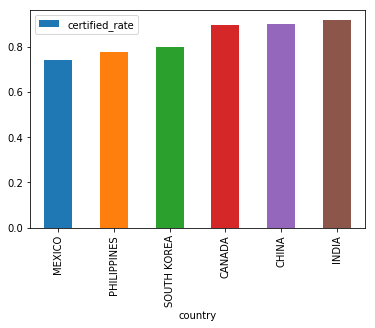

In [148]:
country_massive.sort_values(by='certified_rate')[-10:].plot('country', 'certified_rate', kind='bar').get_figure().savefig('certified_rate.pdf')



## the first 7 contries who has the highest pass rate

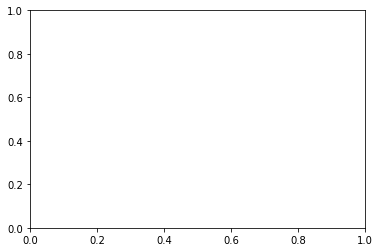

In [158]:
fig, ax = plt.subplots()

In [167]:
ax.bar(country_massive.sort_values(by='certified_rate')['country'], country_massive.sort_values(by='certified_rate')['certified_rate'])

<BarContainer object of 6 artists>

In [170]:
for tick in ax.get_xticklabels():
    tick.set_rotation(15)

In [172]:
fig.savefig('certified_rate.pdf')

In [135]:
country_massive.sort_values(by='certified_rate')[-10:]

,country,total,certified,certified_expired,denied,withdrawn,certified_rate
116,MEXICO,8284,3249,2891,1777,367,0.741188
141,PHILIPPINES,7883,3180,2944,1361,398,0.776862
164,SOUTH KOREA,23614,10634,8202,2382,2396,0.797662
34,CANADA,13776,6462,5862,805,647,0.894599
40,CHINA,27755,13995,10936,1487,1337,0.898253
79,INDIA,194611,95680,82551,8546,7834,0.915832


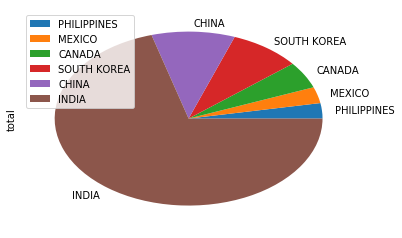

In [142]:
country_massive.sort_values(by='total')[-10:].plot('country', 'total', kind='pie').get_figure().savefig('total.pdf')

The figure of total applicatants and the certified rate. In the dataset, we can find two columns which contains the citizenship of the applicants: "country of citizenship" and "country of citzenship". In fact the two attribute contains the same information and the second one is a typo. Before a certain time, the citizenship information are stored in the typo column, and after that time point all the information are stored in the right solumnHere we consider both "Certified" and "Certified-Expired" as those cases where applicants were certified a Visa. In total, there are applicants from 202 countries who applied for a US permenient Visa in 2010-2016 according to the data set. If we only consider those countries whose number of applicants is over 5000 in those years, we can find only seven country, which are :Canada, China, India, Mexico, Philippines, South Korea. Even between these countries, the number of applicants varies sharply. Look at the pie figure we can easily know that the number of applicants of India is more than the sum of number of those in all other countries. 

In [16]:
class_of_admission = data[['class_of_admission']]

In [11]:
visa_list = sorted(list(set(class_of_admission.dropna().values)))

In [74]:
len(visa_list)

57

In [12]:
length_list = list()

In [18]:
for visa_type in visa_list:
    num = len(class_of_admission.loc[class_of_admission['class_of_admission'] == visa_type])
    length_list.append([visa_type, num])

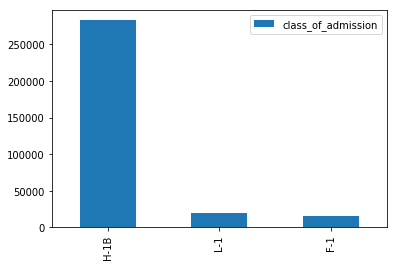

In [80]:
pd.DataFrame(class_of_admission['class_of_admission'].value_counts())[:3].plot(kind='bar').get_figure().savefig('type.pdf')

## the type of visa held by PERM applicants

In [22]:
pd.DataFrame(length_list, columns=['visa_type', 'num']).sort_values('num')

,visa_type,num
2,AOS,1
26,H1B,1
41,P-2,2
54,V-2,2
3,AOS/H-1B,2
53,U-1,2
30,K-1,2
34,M-2,3
35,N,4
49,T-1,4


## transfer original excel file into csv

In [6]:
import pandas as pd

In [7]:
import time

In [5]:
start = time.clock()
data_2017_1 = pd.read_csv("data/PERM_Disclosure_Data_FY2018_Q4_EOY.csv",encoding = "ISO-8859-1")
print(time.clock()-start)

/Users/tianshup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/Users/tianshup/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3.131173000000004


/Users/tianshup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
start = time.clock()
data_2017_1 = pd.read_excel("data/PERM_Disclosure_Data_FY2018_Q4_EOY.xlsx")
print(time.clock()-start)

/Users/tianshup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


77.325688


/Users/tianshup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


## look into the attribute values deeper

In [8]:
data_2018 = pd.read_csv("data/PERM_2018.csv")

/Users/tianshup/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
set(data_2018["EMPLOYER_COUNTRY"].values)

{'CANADA',
 'COLOMBIA',
 'GEORGIA',
 'ICELAND',
 'UNITED STATES OF AMERICA',
 'VIETNAM',
 nan}

In [16]:
data_2018[data_2018["EMPLOYER_COUNTRY"] == 'CANADA']

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
20068,A-17241-81412,1/11/18,Certified-Expired,8/29/17,N,NaN,NaN,N,"Espial Inc, DE",200 Elgin Street,...,A,Y,A,Y,N,Attorney,Chief Financial Officer,518210,"Data Processing, Hosting, and Related Services",Computer Systems Analysts
23759,A-17255-85965,2/2/18,Withdrawn,9/12/17,N,NaN,NaN,N,"Espial Inc, DE",200 Elgin Street,...,A,Y,A,Y,N,Attorney,CFO,518210,"Data Processing, Hosting, and Related Services",Computer Systems Analyst
62463,A-17312-08615,5/22/18,Certified,1/23/18,N,NaN,NaN,N,LULULEMON USA INC.,400 - 1818 CORNWALL AVENUE,...,A,N,A,Y,N,Attorney,Global Mobility Specialist,4481,Clothing Stores,Computer Systems Analysts


In [17]:
data_2018[data_2018["EMPLOYER_COUNTRY"] == 'COLOMBIA']

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
62913,A-13142-65686,5/22/18,Denied,6/7/13,N,NaN,NaN,N,RELIANCE 2 LLC,301 E 7TH ST,...,A,Y,A,A,N,ESQUIRE,CO-OWNER,447110,Gasoline Stations with Convenience Stores,CASHIER


In [18]:
data_2018[data_2018["EMPLOYER_COUNTRY"] == 'GEORGIA']

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
37168,A-17181-58852,3/20/18,Certified-Expired,7/18/17,N,NaN,NaN,N,Kingdom Woodworks,2402 Tech Center Parkway,...,A,Y,A,A,N,ATTORNEY,PRINCIPAL,337110,Wood Kitchen Cabinet and Countertop Manufacturing,Cabinetmaker


In [19]:
data_2018[data_2018["EMPLOYER_COUNTRY"] == 'ICELAND']

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
118663,A-17214-71083,9/24/18,Withdrawn,6/30/17,N,NaN,NaN,N,FINO CONSULTING LLC,20 W 37TH STREET,...,A,Y,A,A,N,ATTORNEY,HR GENERALIST,54169,Other Scientific and Technical Consulting Serv...,SOFTWARE ENGINEER


In [20]:
data_2018[data_2018["EMPLOYER_COUNTRY"] == 'VIETNAM']

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
15999,A-17117-31254,12/19/17,Denied,5/9/17,N,NaN,NaN,N,REFUGEE HELPING CENTER II,8942 GARDEN GROVE BLVD,...,A,N,N,N,Y,NaN,CEO,6241,Individual and Family Services,HUMAN RESOURCES SPECIALIST


In [21]:
data_2018[data_2018["EMPLOYER_COUNTRY"].isnull()]

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
1939,A-17100-22957,10/13/17,Withdrawn,4/3/17,N,NaN,NaN,N,"JCG FOODS OF ALABAMA, LLC",764 GEORGE CAGLE DRIVE,...,A,A,A,A,N,AGENT,COMPLEX HR MANAGER,311615,Poultry Processing,"MEAT, POULTRY & FISH CUTTERS AND TRIMMERS"
11931,A-17100-22958,11/22/17,Withdrawn,4/3/17,N,NaN,NaN,N,"JCG FOODS OF ALABAMA, LLC",764 GEORGE CAGLE DRIVE,...,A,A,A,A,N,AGENT,COMPLEX HR MANAGER,311615,Poultry Processing,"MEAT, POULTRY & FISH CUTTERS AND TRIMMERS"
13507,A-13028-34975,12/6/17,Certified-Expired,1/28/13,N,NaN,NaN,N,USC OPERATING COMPANY LLC,21 EAST 16TH STREET,...,A,Y,A,A,N,NaN,DIRECTOR OF HUMAN RESOURCES,722110,Full-Service Restaurants,GRILL COOK
13720,A-12355-24566,12/7/17,Denied,12/13/12,N,NaN,NaN,N,DR. B.J.STRODEL,7608 MARYKNOLL AVE.,...,Y,Y,Y,Y,Y,PRESIDENT AND OWNER,PRESIDENT AND OWNER,NaN,NaN,"COMPUTER SUPPORT SPECIALIST, LANGUAGE TRANSLATOR"
18865,A-17240-80499,1/5/18,Denied,8/25/17,N,NaN,NaN,N,SMILE FACTORY,345 S ADAMS,...,A,Y,A,A,NaN,LAW STUDENT,OWNER,NaN,NaN,DENTAL ASST.
21946,A-17221-73853,1/24/18,Certified-Expired,8/7/17,N,NaN,NaN,N,ROSEN SAPPERSTEIN & FRIEDLANDER LLC,300 RED BROOK BOULEVARD,...,A,A,A,Y,N,ATTORNEY,HR CONSULTANT,541211,Offices of Certified Public Accountants,ACCOUNTANTS AND AUDITORS
32265,A-17142-40998,3/5/18,Certified-Expired,5/18/17,N,NaN,NaN,N,CHONGRO OVERSEAS CO. LTD,38 WEST 32ND STREET SUITE 1500,...,A,A,A,A,N,ATTORNEY AT LAW,PRESIDENT,611710,Educational Support Services,PUBLIC RELATIONS SPECIALIST
32854,A-17248-83488,3/7/18,Denied,9/1/17,N,NaN,TEXAS,NaN,CLASSIC AUTO RESTYLING,2211 CINCINNATI AVE.,...,N,Y,A,Y,Y,SOLE PROPRIETOR,SOLE PROPRIETOR,NaN,NaN,NaN
33599,A-17230-77336,3/8/18,Certified-Expired,8/15/17,N,NaN,NaN,N,DANCE FEVER INC.,200 WELLS AVENUE,...,A,Y,A,A,N,NaN,PRESIDENT,NaN,NaN,CHOREOGRAPHERS
39629,A-17256-86352,3/28/18,Denied,9/8/17,N,NaN,NaN,N,OCHSNER BAPTIST A CAMPUS OF OCHSNER MEDICAL CE...,2700 NAPOLEON AV,...,Y,Y,Y,A,Y,LAB SUPERVISOR,NaN,622,Hospitals,MEDICAL LABORATORY SCIENCE-GENERALIST


In [54]:
USA_data_2018 = data_2018[data_2018["EMPLOYER_COUNTRY"] == 'UNITED STATES OF AMERICA']

## a lot of employer are from outside the USA

In [25]:
USA_data_2018["EMPLOYER_STATE"].unique()

array(['FL', 'NJ', 'TX', 'MA', 'IL', 'NC', 'CA', 'LA', 'NY', 'IN', 'PA',
       'WI', 'TN', 'OK', 'CO', 'IA', 'VA', 'MI', 'MN', 'MD', 'UT', 'AZ',
       'CT', 'GA', 'NE', 'KS', 'MO', 'NH', 'OH', 'DC', 'WA', 'SC', 'VT',
       'NM', 'DE', 'NV', 'GU', 'OR', 'ME', 'AL', 'AR', 'ND', 'ID', 'KY',
       'SD', 'RI', 'HI', nan, 'MP', 'MT', 'AK', 'WV', 'MS', 'PR', 'WY',
       'VI'], dtype=object)

In [27]:
USA_data_2018 = USA_data_2018[USA_data_2018["EMPLOYER_STATE"].notnull()]

In [32]:
import numpy as np

In [33]:
np.array(sorted(USA_data_2018["EMPLOYER_STATE"].unique())).reshape(-1, 11)

array([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA'],
       ['GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD'],
       ['ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH'],
       ['NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC'],
       ['SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']],
      dtype='<U2')

In [41]:
len(USA_data_2018["EMPLOYER_NUM_EMPLOYEES"].unique()) / len(USA_data_2018)

0.02965103653341797

## various type of job

In [43]:
USA_data_2018["PW_SOC_CODE"].unique()

array(['15-1132', '15-1121', '15-2041', '15-1199', '27-1014', '15-1133',
       '15-1142', '15-1122', '15-1141', '11-9051', '25-1011', '17-2072',
       '17-2051', '13-1111', '13-2031', '11-3021', '27-1025', '43-6014',
       '51-6052', '35-2014', '11-2021', '13-2011', '13-1161', '13-1151',
       '25-9031', '17-2071', '43-9041', '23-1011', '13-2051', '25-1021',
       '11-9021', '27-2022', '13-1081', '29-2011', '27-3022', '11-3031',
       '27-1021', '11-9041', '29-1063', '17-2031', '15-2011', '27-2012',
       '19-1022', '17-2112', '11-3011', '29-2052', '29-1122', '17-1011',
       '25-1022', '41-3031', '11-9111', '19-4021', '15-1131', '37-3011',
       '19-1021', '29-1069', '41-9031', '15-1143', '41-1011', '29-1051',
       '37-1012', '11-1021', '17-2131', '43-5011', '11-2022', '51-3011',
       '17-2141', '13-2052', '19-2031', '11-9199', '13-1071', '15-1052',
       '25-1124', '29-1131', '13-1121', '19-1042', '15-1134', '17-2161',
       '25-3021', '25-3011', '51-3022', '45-2092', 

In [47]:
USA_data_2018["PW_LEVEL_9089"].unique()

array(['Level III', nan, 'Level II', 'Level I', 'Level IV'], dtype=object)

In [48]:
USA_data_2018[USA_data_2018["PW_LEVEL_9089"].isnull()]

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
1,A-17268-91198,10/1/17,Withdrawn,9/29/17,N,NaN,NaN,N,NOVO NORDISK INC.,800 SCUDDERS MILL ROAD,...,A,A,A,Y,N,Partner,"Associate Director, Mobility - Human Resources",325412,Pharmaceutical Preparation Manufacturing,Senior Systems Analyst
61,A-17153-45824,10/2/17,Certified-Expired,6/28/17,N,NaN,NaN,N,INTUIT,2600 CASEY AVE,...,A,N,A,Y,N,Associate Attorney,Senior Immigration Specialist,541512,Computer Systems Design Services,Marketing Managers
82,A-17165-51071,10/2/17,Certified-Expired,6/26/17,N,NaN,NaN,N,KLA-TENCOR CORPORATION,ONE TECHNOLOGY DRIVE,...,A,N,A,Y,N,Associate Attorney,Global Mobility Program Manager,333314,Optical Instrument and Lens Manufacturing,"Software Developers, Applications"
101,A-17166-51395,10/2/17,Certified-Expired,6/22/17,N,NaN,NaN,N,HEWLETT PACKARD ENTERPRISE COMPANY,3000 HANOVER STREET,...,A,N,A,Y,N,Attorney at Law,AMS Regional Lead – Global Employee Mobility,54141,Interior Design Services,"Software Developers, Systems Software"
116,A-17102-24265,10/2/17,Certified-Expired,6/20/17,N,NaN,NaN,N,INTUIT,2600 CASEY AVE,...,A,N,A,Y,N,Associate Attorney,Senior Immigration Specialist,541512,Computer Systems Design Services,Marketing Managers
119,A-17083-17115,10/2/17,Certified-Expired,6/20/17,N,NaN,NaN,N,INTUIT,2600 CASEY AVE,...,A,N,A,Y,N,Associate Attorney,Senior Immigration Specialist,541512,Computer Systems Design Services,Marketing Managers
129,A-16194-31752,10/2/17,Certified-Expired,6/18/17,N,NaN,NaN,N,"Black & Veatch Construction, Inc.",11401 Lamar Ave,...,A,Y,N,Y,N,Attorney,"HR Business Partner, Construction & Procurement",237990,Other Heavy and Civil Engineering Construction,Electrical Engineers
163,A-17093-20175,10/2/17,Certified-Expired,6/9/17,N,NaN,NaN,N,"BLACKHAWK NETWORK, INC.",6220 STONERIDGE MALL ROAD,...,A,A,A,Y,N,Partner,Senior Human Resources Generalist,522320,"Financial Transactions Processing, Reserve, an...",Market Research Analysts and Marketing Special...
171,A-17131-36927,10/2/17,Certified-Expired,6/9/17,N,NaN,NaN,N,"BIOMARIN PHARMACEUTICAL, INC.",105 DIGITAL DRIVE,...,A,Y,A,Y,N,Attorney,"Senior Manager, Global Talent Operations",325414,Biological Product (except Diagnostic) Manufac...,Biochemists and Biophysicists
173,A-17124-34143,10/2/17,Certified-Expired,6/9/17,N,NaN,NaN,N,"CISCO SYSTEMS, INC.",170 WEST TASMAN DRIVE,...,A,N,A,Y,N,Attorney at Law,Americas Relocation Specialist,334111,Electronic Computer Manufacturing,Computer Network Architects


In [49]:
USA_data_2018["PW_SOURCE_NAME_9089"].unique()

array(['OES', 'Other', 'CBA', nan, 'Employer Conducted', 'DBA', 'SCA'],
      dtype=object)

In [53]:
USA_data_2018["JOB_INFO_WORK_STATE"].unique()

array(['FL', 'NJ', 'TX', 'CA', 'MA', 'IL', 'NC', 'LA', 'GA', 'IN', 'WA',
       'WI', 'TN', 'OK', 'CO', 'PA', 'AZ', 'IA', 'VA', 'NY', 'MI', 'MN',
       'MD', 'UT', 'SC', 'NM', 'CT', 'NE', 'MO', 'NH', 'OH', 'DC', 'KS',
       'VT', 'DE', 'NV', 'OR', 'GU', 'ME', 'AL', 'AR', 'KY', 'ID', 'RI',
       'MS', 'ND', 'HI', 'MP', 'MT', 'AK', 'WV', 'PR', nan, 'SD', 'WY',
       'VI', 'MH'], dtype=object)

In [58]:
USA_data_2018_state_notnull = USA_data_2018[USA_data_2018["JOB_INFO_WORK_STATE"].notnull()]

In [64]:
USA_data_2018_state_notnull["JOB_INFO_WORK_STATE"].unique()

array(['FL', 'NJ', 'TX', 'CA', 'MA', 'IL', 'NC', 'LA', 'GA', 'IN', 'WA',
       'WI', 'TN', 'OK', 'CO', 'PA', 'AZ', 'IA', 'VA', 'NY', 'MI', 'MN',
       'MD', 'UT', 'SC', 'NM', 'CT', 'NE', 'MO', 'NH', 'OH', 'DC', 'KS',
       'VT', 'DE', 'NV', 'OR', 'GU', 'ME', 'AL', 'AR', 'KY', 'ID', 'RI',
       'MS', 'ND', 'HI', 'MP', 'MT', 'AK', 'WV', 'PR', 'SD', 'WY', 'VI',
       'MH'], dtype=object)

In [65]:
data_2012 = pd.read_csv("data/PERM_2012.csv")

/Users/tianshup/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## the dataset of 2012 only 2 certified, we omit this dataset

In [75]:
data_2012[data_2012['CASE_STATUS'] == 'Certified']

,CASE_NO,DECISION_DATE,CASE_STATUS,APPLICATION_TYPE,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,2007_NAICS_US_CODE,...,PW_SOURCE_NAME_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,WAGE_OFFER_FROM_9089,WAGE_OFFER_TO_9089,WAGE_OFFER_UNIT_OF_PAY_9089,JOB_INFO_WORK_CITY,JOB_INFO_WORK_STATE,COUNTRY_OF_CITZENSHIP,CLASS_OF_ADMISSION
3269,A-10243-16607,5/11/12,Certified,ONLINE,DIGITAL TECHNOLOGY SOLUTIONS LLC,28175 HAGGERTY ROAD,NOVI,MICHIGAN,48377,541511,...,NaN,NaN,NaN,NaN,NaN,NaN,Novi,MICHIGAN,INDIA,H-1B
56971,A-12142-64799,8/24/12,Certified,ONLINE,"MAXWELL M. NAZARI, DDS, INC.",355 S. LEMON AVE,WALNUT,CALIFORNIA,91789,621210,...,OES,43721.6,yr,43730.0,43730.0,yr,Walnut,CALIFORNIA,IRAN,Not in USA


In [68]:
data_2013 = pd.read_csv("data/PERM_2013.csv")

In [70]:
data_2013[data_2013['Case_Status'] == 'Certified']

,CASE_NO,Decision_Date,Case_Status,APPLICATION_TYPE,Employer_Name,Employer_address_1,Employer_address_2,Employer_City,Employer_State,Employer_Postal_Code,...,PW_Job_Title_9089,PW_SOURCE_NAME_9089,PW_AMOUNT_9089,PW_Unit_of_Pay_9089,WAGE_OFFERED_FROM_9089,WAGE_OFFERED_TO_9089,Job_Info_Work_City,Job_Info_Work_State,Country_of_Citizenship,Class_of_Admission
0,A-09042-27228,8/16/13,Certified,ONLINE,ARCHITECTURAL STONE ACCENTS INC,3661 PRESIDENTIAL PKWY,NaN,ATLANTA,GEORGIA,30340,...,First-Line Supervisors/Managers of Production ...,OES,27.26,Hour,28.00,NaN,ATLANTA,GEORGIA,BRAZIL,NaN
2,A-09068-32639,5/2/13,Certified,ONLINE,"STMICROELECTRONICS, INC.",750 CANYON DRIVE,NaN,COPPELL,TEXAS,75019,...,"Electronics Engineers, Except Computer",Other,95498.00,Year,124500.00,NaN,Santa Clara,CALIFORNIA,INDIA,H-1B
3,A-09069-32769,8/16/13,Certified,ONLINE,"STMICROELECTRONICS, INC.",750 CANYON DRIVE,NaN,COPPELL,TEXAS,75019,...,"Electronics Engineers, Except Computer",OES,105685.00,Year,107500.00,NaN,Coppell,TEXAS,PHILIPPINES,L-1
5,A-09072-33706,5/9/13,Certified,ONLINE,"CISCO SYSTEMS, INC.",170 WEST TASMAN DRIVE,MAIL STOP: SJC 05/1/4,SAN JOSE,CALIFORNIA,95134,...,"Computer Software Engineers, Systems Software",Other,101505.00,Year,101505.00,121216.00,San Jose,CALIFORNIA,INDIA,H-1B
6,A-09079-34846,5/9/13,Certified,ONLINE,"CISCO SYSTEMS, INC.",170 WEST TASMAN DRIVE,MAIL STOP: SJC 05/1/4,SAN JOSE,CALIFORNIA,95134,...,"Computer Software Engineers, Systems Software",Other,83905.00,Year,83905.00,101504.00,San Jose,CALIFORNIA,INDIA,H-1B
8,A-08212-74534,4/18/13,Certified,ONLINE,MICROSOFT CORPORATION,ONE MICROSOFT WAY,NaN,REDMOND,WASHINGTON,98052,...,Computer Programmers,OES,47611.00,Year,81600.00,NaN,Irving,TEXAS,COLOMBIA,H-1B
13,A-08246-83297,5/20/13,Certified,ONLINE,"GOOD ENOUGH TO EAT UPTOWN, LTD.",483 AMSTERDAM AVENUE,NaN,NEW YORK,NEW YORK,10024,...,"Bakers, Bread and Pastry",OES,10.37,Hour,10.37,NaN,New York,NEW YORK,MEXICO,NaN
14,A-08246-83442,8/8/13,Certified,ONLINE,CHABAD LUBAVITCH CENTER,784 EASTERN PARKWAY,NaN,BROOKLYN,NEW YORK,11213,...,Interpreters and Translators,OES,13.95,Hour,13.95,NaN,Brooklyn,NEW YORK,GERMANY,NaN
15,A-08248-84111,5/20/13,Certified,ONLINE,"SUPER CLEANERS TUCSON, INC.",515 E. GRANT ROAD. SUITE #151,NaN,TUCSON,ARIZONA,85705,...,"Bookkeeping, Accounting, and Auditing Clerks",OES,28808.00,Year,28808.00,NaN,Tucson,ARIZONA,SOUTH KOREA,NaN
18,A-08255-86295,5/9/13,Certified,ONLINE,ARIZONA PUBLIC SERVICE,400 N. 5TH ST.,NaN,PHOENIX,ARIZONA,85004,...,"Computer Software Engineers, Applications",OES,71115.00,Year,71115.00,97860.00,Phoenix,ARIZONA,INDIA,H-1B


In [71]:
data_2011 = pd.read_csv("data/PERM_2011.csv")

/Users/tianshup/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
data_2011[data_2011['CASE_STATUS'] == 'Certified']

,CASE_NO,DECISION_DATE,CASE_STATUS,APPLICATION_TYPE,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,EMPLOYER_ADDRESS_2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,...,PW_SOURCE_NAME_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,WAGE_OFFER_FROM_9089,WAGE_OFFER_TO_9089,WAGE_OFFER_UNIT_OF_PAY_9089,JOB_INFO_WORK_CITY,JOB_INFO_WORK_STATE,COUNTRY_OF_CITZENSHIP,CLASS_OF_ADMISSION
1,A-05207-17051,9/22/11,Certified,PERM,SHAMIN HOTELS,2000 WARE BOTTOM SPRING ROAD,NaN,CHESTER,VA,23838,...,OES,16.32,hr,16.35,NaN,hr,Chester,VA,VENEZUELA,NaN
25,A-08009-11471,9/6/11,Certified,PERM,ANSWERTHINK,1001 BRICKELL BAY DRIVE,SUITE 3000,MIAMI,FL,33131,...,OES,67766.00,yr,115000.00,NaN,yr,Conshohocken,PA,INDIA,H-1B
83,A-08031-19145,8/24/11,Certified,PERM,HATEM ENTERPRISES,94 EAST FALMOUTH HYW,NaN,EAST FALMOUTH,MA,02536,...,OES,25.42,hr,25.42,NaN,hr,East Falmouth,MA,CANADA,TN
108,A-08046-24598,7/12/11,Certified,PERM,FEDERAL HOME LOAN MORTGAGE CORPORATION,8250 JONES BRANCH DRIVE,NaN,MCLEAN,VA,22102,...,Other,73900.00,yr,73900.00,NaN,yr,McLean,VA,INDIA,H-1B
129,A-07026-04745,9/22/11,Certified,PERM,"INFOQUEST CONSULTING GROUP, INC.",2540 ROUTE 130 NORTH,SUITE 118A,CRANBURY,NJ,08512,...,OES,75379.00,yr,76000.00,NaN,yr,Cranbury,NJ,INDIA,Parolee
138,A-07065-16993,6/24/11,Certified,PERM,"NEW ENGLAND SYSTEMS, INC.",200 CENTER STEET,SUITE 16,LUDLOW,MA,01056,...,OES,86486.00,yr,86500.00,NaN,yr,Ludlow,MA,INDIA,H-1B
139,A-07086-22870,6/14/11,Certified,PERM,M/A-COM- A TYCO COMPANY,1011 PAWTUCKET BLVD.,NaN,LOWELL,MA,01853,...,OES,63294.00,yr,84000.00,NaN,yr,Lowell,MA,JAPAN,H-1B
143,A-07102-27418,6/14/11,Certified,PERM,"UNICORN POLISH BAKERY, INC.",378 KELLY ROAD,NaN,VERNON,CT,06066,...,OES,8.13,hr,12.00,NaN,hr,Vernon,CT,POLAND,B-2
154,A-07158-44340,6/14/11,Certified,PERM,GENERAL ELECTRIC COMPANY (GE ENERGY),1 RIVER ROAD,NaN,SCHENECTADY,NY,12345,...,OES,57470.00,yr,57470.00,95000.00,yr,Atlanta,GA,TAIWAN,H-1B
160,A-07171-48667,7/22/11,Certified,PERM,GENERAL ELECTRIC COMPANY (GE ENERGY),1 RIVER ROAD,NaN,SCHENECTADY,NY,12345,...,OES,100235.00,yr,100235.00,130000.00,yr,Plainville,CT,PHILIPPINES,H-1B


## focus on the data from 2017 and 2018, since Trump is a president

In [3]:
import pandas as pd

In [2]:
data_2013 = pd.read_csv("data/PERM_2013.csv")

In [5]:
data_2013.columns

Index(['CASE_NO', 'Decision_Date', 'Case_Status', 'APPLICATION_TYPE',
       'Employer_Name', 'Employer_address_1', 'Employer_address_2',
       'Employer_City', 'Employer_State', 'Employer_Postal_Code',
       '2007_NAICS_US_Code', '2007 NAICS US TITLE', 'US ECONOMIC SECTOR',
       'PW_SOC_Code', 'PW SOC Title', 'Add_These_PW_Job_Title_9089',
       'PW_LEVEL_9089', 'PW_Job_Title_9089', 'PW_SOURCE_NAME_9089',
       'PW_AMOUNT_9089', 'PW_Unit_of_Pay_9089', 'WAGE_OFFERED_FROM_9089',
       'WAGE_OFFERED_TO_9089', 'Job_Info_Work_City', 'Job_Info_Work_State',
       'Country_of_Citizenship', 'Class_of_Admission'],
      dtype='object')

In [4]:
data_2017 = pd.read_csv("data/PERM_2017.csv")

/Users/tianshup/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data_2017.columns

Index(['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE',
       'REFILE', 'ORIG_FILE_DATE', 'ORIG_CASE_NO', 'SCHD_A_SHEEPHERDER',
       'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1',
       ...
       'FW_INFO_TRAINING_COMP', 'FW_INFO_REQ_EXPERIENCE',
       'FW_INFO_ALT_EDU_EXPERIENCE', 'FW_INFO_REL_OCCUP_EXP',
       'PREPARER_INFO_EMP_COMPLETED', 'PREPARER_INFO_TITLE',
       'EMPLOYER_DECL_INFO_TITLE', 'NAICS_US_CODE', 'NAICS_US_TITLE',
       'PW_JOB_TITLE_9089'],
      dtype='object', length=125)

In [5]:
data_2018 = pd.read_csv("data/PERM_2018.csv")

/Users/tianshup/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data_2018.columns

Index(['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE',
       'REFILE', 'ORIG_FILE_DATE', 'ORIG_CASE_NO', 'SCHD_A_SHEEPHERDER',
       'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1',
       ...
       'FW_INFO_TRAINING_COMP', 'FW_INFO_REQ_EXPERIENCE',
       'FW_INFO_ALT_EDU_EXPERIENCE', 'FW_INFO_REL_OCCUP_EXP',
       'PREPARER_INFO_EMP_COMPLETED', 'PREPARER_INFO_TITLE',
       'EMPLOYER_DECL_INFO_TITLE', 'NAICS_US_CODE', 'NAICS_US_TITLE',
       'PW_JOB_TITLE_9089'],
      dtype='object', length=125)

## do some preprocessing

In [10]:
set(data_2017.columns).difference(set(data_2018.columns))

{'JOB_INFO_TRAINING_NUM_MONTHS'}

In [11]:
set(data_2018.columns).difference(set(data_2017.columns))

{'JOB_INFO_TRANING_NUM_MONTHS'}

In [12]:
'JOB_INFO_TRANING_NUM_MONTHS' in set(data_2018.columns)

True

In [13]:
list(data_2018.columns)

['CASE_NUMBER',
 'DECISION_DATE',
 'CASE_STATUS',
 'CASE_RECEIVED_DATE',
 'REFILE',
 'ORIG_FILE_DATE',
 'ORIG_CASE_NO',
 'SCHD_A_SHEEPHERDER',
 'EMPLOYER_NAME',
 'EMPLOYER_ADDRESS_1',
 'EMPLOYER_ADDRESS_2',
 'EMPLOYER_CITY',
 'EMPLOYER_STATE',
 'EMPLOYER_COUNTRY',
 'EMPLOYER_POSTAL_CODE',
 'EMPLOYER_PHONE',
 'EMPLOYER_PHONE_EXT',
 'EMPLOYER_NUM_EMPLOYEES',
 'EMPLOYER_YR_ESTAB',
 'FW_OWNERSHIP_INTEREST',
 'AGENT_FIRM_NAME',
 'AGENT_CITY',
 'AGENT_STATE',
 'PW_TRACK_NUM',
 'PW_SOC_CODE',
 'PW_SOC_TITLE',
 'PW_LEVEL_9089',
 'PW_AMOUNT_9089',
 'PW_UNIT_OF_PAY_9089',
 'PW_SOURCE_NAME_9089',
 'PW_SOURCE_NAME_OTHER_9089',
 'PW_DETERM_DATE',
 'PW_EXPIRE_DATE',
 'WAGE_OFFER_FROM_9089',
 'WAGE_OFFER_TO_9089',
 'WAGE_OFFER_UNIT_OF_PAY_9089',
 'JOB_INFO_WORK_CITY',
 'JOB_INFO_WORK_STATE',
 'JOB_INFO_WORK_POSTAL_CODE',
 'JOB_INFO_JOB_TITLE',
 'JOB_INFO_EDUCATION',
 'JOB_INFO_EDUCATION_OTHER',
 'JOB_INFO_MAJOR',
 'JOB_INFO_TRAINING',
 'JOB_INFO_TRANING_NUM_MONTHS',
 'JOB_INFO_TRAINING_FIELD',
 'JOB_

In [6]:
data_2018.columns = ['CASE_NUMBER',
 'DECISION_DATE',
 'CASE_STATUS',
 'CASE_RECEIVED_DATE',
 'REFILE',
 'ORIG_FILE_DATE',
 'ORIG_CASE_NO',
 'SCHD_A_SHEEPHERDER',
 'EMPLOYER_NAME',
 'EMPLOYER_ADDRESS_1',
 'EMPLOYER_ADDRESS_2',
 'EMPLOYER_CITY',
 'EMPLOYER_STATE',
 'EMPLOYER_COUNTRY',
 'EMPLOYER_POSTAL_CODE',
 'EMPLOYER_PHONE',
 'EMPLOYER_PHONE_EXT',
 'EMPLOYER_NUM_EMPLOYEES',
 'EMPLOYER_YR_ESTAB',
 'FW_OWNERSHIP_INTEREST',
 'AGENT_FIRM_NAME',
 'AGENT_CITY',
 'AGENT_STATE',
 'PW_TRACK_NUM',
 'PW_SOC_CODE',
 'PW_SOC_TITLE',
 'PW_LEVEL_9089',
 'PW_AMOUNT_9089',
 'PW_UNIT_OF_PAY_9089',
 'PW_SOURCE_NAME_9089',
 'PW_SOURCE_NAME_OTHER_9089',
 'PW_DETERM_DATE',
 'PW_EXPIRE_DATE',
 'WAGE_OFFER_FROM_9089',
 'WAGE_OFFER_TO_9089',
 'WAGE_OFFER_UNIT_OF_PAY_9089',
 'JOB_INFO_WORK_CITY',
 'JOB_INFO_WORK_STATE',
 'JOB_INFO_WORK_POSTAL_CODE',
 'JOB_INFO_JOB_TITLE',
 'JOB_INFO_EDUCATION',
 'JOB_INFO_EDUCATION_OTHER',
 'JOB_INFO_MAJOR',
 'JOB_INFO_TRAINING',
 'JOB_INFO_TRAINING_NUM_MONTHS',
 'JOB_INFO_TRAINING_FIELD',
 'JOB_INFO_EXPERIENCE',
 'JOB_INFO_EXPERIENCE_NUM_MONTHS',
 'JOB_INFO_ALT_FIELD',
 'JOB_INFO_ALT_FIELD_NAME',
 'JOB_INFO_ALT_COMBO_ED_EXP',
 'JOB_INFO_ALT_COMBO_ED',
 'JOB_INFO_ALT_COMBO_ED_OTHER',
 'JOB_INFO_ALT_CMB_ED_OTH_YRS',
 'JOB_INFO_FOREIGN_ED',
 'JOB_INFO_ALT_OCC',
 'JOB_INFO_ALT_OCC_NUM_MONTHS',
 'JOB_INFO_ALT_OCC_JOB_TITLE',
 'JOB_INFO_JOB_REQ_NORMAL',
 'JOB_INFO_FOREIGN_LANG_REQ',
 'JOB_INFO_COMBO_OCCUPATION',
 'JI_OFFERED_TO_SEC_J_FW',
 'JI_FW_LIVE_ON_PREMISES',
 'JI_LIVE_IN_DOMESTIC_SERVICE',
 'JI_LIVE_IN_DOM_SVC_CONTRACT',
 'RECR_INFO_PROFESSIONAL_OCC',
 'RECR_INFO_COLL_UNIV_TEACHER',
 'RECR_INFO_COLL_TEACH_COMP_PROC',
 'RI_COLL_TCH_BASIC_PROCESS',
 'RI_COLL_TEACH_SELECT_DATE',
 'RI_COLL_TEACH_PRO_JNL',
 'RECR_INFO_SWA_JOB_ORDER_START',
 'RECR_INFO_SWA_JOB_ORDER_END',
 'RECR_INFO_SUNDAY_NEWSPAPER',
 'RI_1ST_AD_NEWSPAPER_NAME',
 'RECR_INFO_FIRST_AD_START',
 'RI_2ND_AD_NEWSPAPER_NAME',
 'RI_2ND_AD_NEWSPAPER_OR_JOURNAL',
 'RECR_INFO_SECOND_AD_START',
 'RECR_INFO_JOB_FAIR_FROM',
 'RECR_INFO_JOB_FAIR_TO',
 'RECR_INFO_ON_CAMPUS_RECR_FROM',
 'RECR_INFO_ON_CAMPUS_RECR_TO',
 'RI_EMPLOYER_WEB_POST_FROM',
 'RI_EMPLOYER_WEB_POST_TO',
 'RECR_INFO_PRO_ORG_ADVERT_FROM',
 'RECR_INFO_PRO_ORG_ADVERT_TO',
 'RI_JOB_SEARCH_WEBSITE_FROM',
 'RI_JOB_SEARCH_WEBSITE_TO',
 'RI_PVT_EMPLOYMENT_FIRM_FROM',
 'RI_PVT_EMPLOYMENT_FIRM_TO',
 'RI_EMPLOYEE_REFERRAL_PROG_FROM',
 'RI_EMPLOYEE_REFERRAL_PROG_TO',
 'RI_CAMPUS_PLACEMENT_FROM',
 'RI_CAMPUS_PLACEMENT_TO',
 'RI_LOCAL_ETHNIC_PAPER_FROM',
 'RI_LOCAL_ETHNIC_PAPER_TO',
 'RECR_INFO_RADIO_TV_AD_FROM',
 'RECR_INFO_RADIO_TV_AD_TO',
 'RECR_INFO_EMPLOYER_REC_PAYMENT',
 'RECR_INFO_BARG_REP_NOTIFIED',
 'RI_POSTED_NOTICE_AT_WORKSITE',
 'RI_LAYOFF_IN_PAST_SIX_MONTHS',
 'RI_US_WORKERS_CONSIDERED',
 'FOREIGN_WORKER_INFO_CITY',
 'FOREIGN_WORKER_INFO_STATE',
 'FW_INFO_POSTAL_CODE',
 'COUNTRY_OF_CITIZENSHIP',
 'FW_INFO_BIRTH_COUNTRY',
 'CLASS_OF_ADMISSION',
 'FOREIGN_WORKER_INFO_EDUCATION',
 'FW_INFO_EDUCATION_OTHER',
 'FOREIGN_WORKER_INFO_MAJOR',
 'FW_INFO_YR_REL_EDU_COMPLETED',
 'FOREIGN_WORKER_INFO_INST',
 'FW_INFO_TRAINING_COMP',
 'FW_INFO_REQ_EXPERIENCE',
 'FW_INFO_ALT_EDU_EXPERIENCE',
 'FW_INFO_REL_OCCUP_EXP',
 'PREPARER_INFO_EMP_COMPLETED',
 'PREPARER_INFO_TITLE',
 'EMPLOYER_DECL_INFO_TITLE',
 'NAICS_US_CODE',
 'NAICS_US_TITLE',
 'PW_JOB_TITLE_9089']

In [7]:
data_for_classification = pd.concat([data_2017, data_2018], ignore_index=True)

In [20]:
data_for_classification['REFILE'].unique()

array(['N', 'Y', nan], dtype=object)

In [21]:
data_for_classification.groupby('REFILE').count()

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,EMPLOYER_ADDRESS_2,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
REFILE,,,,,,,,,,,,,,,,,,,,,
N,217147,217147,217147,217147,4,14,217138,217145,217131,71125,...,217119,217120,217121,217116,217085,198331,217096,216908,216908,217091
Y,228,228,228,228,218,221,228,228,228,91,...,226,226,226,226,228,181,228,217,217,225


In [22]:
data_for_classification['REFILE'].value_counts()

N    217147
Y       228
Name: REFILE, dtype: int64

In [23]:
data_for_classification[data_for_classification['REFILE'] == 'Y']['CASE_STATUS'].value_counts()

Denied               86
Certified-Expired    69
Certified            62
Withdrawn            11
Name: CASE_STATUS, dtype: int64

In [24]:
data_for_classification[data_for_classification['REFILE'] == 'N']['CASE_STATUS'].value_counts()

Certified            114204
Certified-Expired     82823
Denied                12579
Withdrawn              7541
Name: CASE_STATUS, dtype: int64

## **we can know that if a case is a refile case then the probability of certification will drop.**

In [10]:
select_columns = ['CASE_STATUS', 
 'REFILE', 
 'EMPLOYER_STATE',
 'EMPLOYER_NUM_EMPLOYEES',
 'FW_OWNERSHIP_INTEREST',
 'PW_SOC_CODE',
 'PW_LEVEL_9089',
 'JOB_INFO_WORK_STATE',
 'JOB_INFO_EDUCATION',
 'JI_OFFERED_TO_SEC_J_FW',
 'FOREIGN_WORKER_INFO_STATE',
 'COUNTRY_OF_CITIZENSHIP',
 'CLASS_OF_ADMISSION',
 'FOREIGN_WORKER_INFO_EDUCATION',
 'FW_INFO_TRAINING_COMP',
 'NAICS_US_CODE',
]

In [8]:
data_201718 = data_for_classification

In [11]:
data_for_classification = data_201718[select_columns]

In [12]:
len(data_for_classification)

217379

In [29]:
len(data_for_classification.dropna())

549

In [93]:
for attr in select_columns:
    print(attr, '\t\t', len(data_for_classification[attr].dropna()))

CASE_STATUS 		 217379
REFILE 		 217375
EMPLOYER_STATE 		 217364
EMPLOYER_NUM_EMPLOYEES 		 217317
FW_OWNERSHIP_INTEREST 		 217358
PW_SOC_CODE 		 217177
PW_LEVEL_9089 		 202372
JOB_INFO_WORK_STATE 		 217347
JOB_INFO_EDUCATION 		 217366
JI_OFFERED_TO_SEC_J_FW 		 217369
FOREIGN_WORKER_INFO_STATE 		 199305
COUNTRY_OF_CITIZENSHIP 		 217358
CLASS_OF_ADMISSION 		 201696
FOREIGN_WORKER_INFO_EDUCATION 		 217353
FW_INFO_TRAINING_COMP 		 217347
NAICS_US_CODE 		 217127


In [103]:
data_for_classification['FOREIGN_WORKER_INFO_EDUCATION'].value_counts()

Master's       91202
Bachelor's     78623
None           21932
Doctorate       9931
Other           8370
High School     5450
Associate's     1845
Name: FOREIGN_WORKER_INFO_EDUCATION, dtype: int64

In [104]:
for edu in data_for_classification['FOREIGN_WORKER_INFO_EDUCATION'].unique():
    print(edu, data_for_classification[data_for_classification['FOREIGN_WORKER_INFO_EDUCATION'] == edu]['CASE_STATUS'].value_counts())
    

Bachelor's Certified            43110
Certified-Expired    30048
Denied                3174
Withdrawn             2291
Name: CASE_STATUS, dtype: int64
Master's Certified            49701
Certified-Expired    35816
Denied                3080
Withdrawn             2605
Name: CASE_STATUS, dtype: int64
None Certified            8842
Certified-Expired    7458
Denied               4006
Withdrawn            1626
Name: CASE_STATUS, dtype: int64
Other Certified            4292
Certified-Expired    3249
Denied                539
Withdrawn             290
Name: CASE_STATUS, dtype: int64
Associate's Certified            725
Certified-Expired    628
Denied               382
Withdrawn            110
Name: CASE_STATUS, dtype: int64
Doctorate Certified            5488
Certified-Expired    3908
Withdrawn             304
Denied                231
Name: CASE_STATUS, dtype: int64
High School Certified            2105
Certified-Expired    1782
Denied               1237
Withdrawn             326
Name: CASE_

## **none, associate and high school are likely to be denied**

In [100]:
data_for_classification['JI_OFFERED_TO_SEC_J_FW'].value_counts()

Y    217334
N        35
Name: JI_OFFERED_TO_SEC_J_FW, dtype: int64

In [102]:
data_for_classification[data_for_classification['JI_OFFERED_TO_SEC_J_FW'] == 'N']['CASE_STATUS'].value_counts()

Denied       34
Withdrawn     1
Name: CASE_STATUS, dtype: int64

## **apparently, applicants with no offer will definitely get denied**

In [99]:
for edu in data_for_classification['JOB_INFO_EDUCATION'].unique():
    print(edu, data_for_classification[data_for_classification['JOB_INFO_EDUCATION'] == edu]['CASE_STATUS'].value_counts())

Master's Certified            48802
Certified-Expired    35448
Denied                2635
Withdrawn             2496
Name: CASE_STATUS, dtype: int64
None Certified            9355
Certified-Expired    8145
Denied               5022
Withdrawn            1814
Name: CASE_STATUS, dtype: int64
Bachelor's Certified            46312
Certified-Expired    31835
Denied                3232
Withdrawn             2373
Name: CASE_STATUS, dtype: int64
Other Certified            3274
Certified-Expired    2565
Denied                293
Withdrawn             214
Name: CASE_STATUS, dtype: int64
Associate's Certified            775
Certified-Expired    587
Denied               274
Withdrawn            102
Name: CASE_STATUS, dtype: int64
Doctorate Certified            3681
Certified-Expired    2600
Withdrawn             223
Denied                126
Name: CASE_STATUS, dtype: int64
High School Certified            2065
Certified-Expired    1709
Denied               1080
Withdrawn             329
Name: CASE_

**Associate, high school and none are more like to be denied**

In [88]:
data_for_classification['FW_OWNERSHIP_INTEREST'].value_counts()

N    216130
Y      1228
Name: FW_OWNERSHIP_INTEREST, dtype: int64

In [92]:
print(data_for_classification[data_for_classification['FW_OWNERSHIP_INTEREST']=='Y']['CASE_STATUS'].value_counts(),'\n',
data_for_classification[data_for_classification['FW_OWNERSHIP_INTEREST']=='N']['CASE_STATUS'].value_counts(),'\n',
data_for_classification[data_for_classification['FW_OWNERSHIP_INTEREST'].isna()]['CASE_STATUS'].value_counts())

Certified            424
Certified-Expired    412
Denied               321
Withdrawn             71
Name: CASE_STATUS, dtype: int64 
 Certified            113841
Certified-Expired     82478
Denied                12332
Withdrawn              7479
Name: CASE_STATUS, dtype: int64 
 Denied               15
Withdrawn             2
Certified-Expired     2
Certified             2
Name: CASE_STATUS, dtype: int64


## **if the applicant has the ownership interest, then he is more likely to be denied. weird**

In [176]:
data_for_classification['EMPLOYER_NUM_EMPLOYEES'].max()

664005241.0

In [178]:
data_for_classification[data_for_classification['EMPLOYER_NUM_EMPLOYEES'] == 664005241.0]["CASE_STATUS"]


69472    Certified
Name: CASE_STATUS, dtype: object

## **values vary too much in EMPLOYER_NUM_EMPLOYEES**

In [86]:
data_for_classification[data_for_classification['EMPLOYER_NUM_EMPLOYEES'] == 0]['CASE_STATUS'].value_counts()

Denied               58
Certified            32
Certified-Expired    16
Withdrawn             3
Name: CASE_STATUS, dtype: int64

In [51]:
data_for_classification['PW_LEVEL_9089'].value_counts()

Level II     69178
Level IV     49044
Level I      46185
Level III    37965
Name: PW_LEVEL_9089, dtype: int64

In [52]:
data_for_classification[data_for_classification['PW_LEVEL_9089'].isna()]['CASE_STATUS'].value_counts()

Certified            7781
Certified-Expired    6164
Denied                661
Withdrawn             401
Name: CASE_STATUS, dtype: int64

## **it seems that the absence of info of PW_LEVEL_9089 doesn't affects too much on the case_status**

## we will see whether the absence of some value will affect the case status

In [53]:
data_for_classification['CLASS_OF_ADMISSION'].value_counts();
data_for_classification[data_for_classification['CLASS_OF_ADMISSION'].isna()]['CASE_STATUS'].value_counts()

Certified            6623
Certified-Expired    5292
Denied               2751
Withdrawn            1017
Name: CASE_STATUS, dtype: int64

In [54]:
data_for_classification['FOREIGN_WORKER_INFO_STATE'].value_counts();
data_for_classification[data_for_classification['FOREIGN_WORKER_INFO_STATE'].isna()]['CASE_STATUS'].value_counts()

Certified            7019
Certified-Expired    6020
Denied               3623
Withdrawn            1412
Name: CASE_STATUS, dtype: int64

In [121]:
data_for_classification['PW_SOC_CODE'].value_counts()

15    119902
17     18245
11     15701
13     13204
25      7429
51      7052
29      6028
35      4690
27      3766
41      3386
43      2855
19      2789
53      2655
37      2158
47      1456
39      1235
31      1162
45      1081
49       896
23       786
21       679
na       202
33        22
Name: PW_SOC_CODE, dtype: int64

In [56]:
data_for_classification[data_for_classification['PW_SOC_CODE'].isna()]['CASE_STATUS'].value_counts()

Denied               180
Certified             15
Certified-Expired      6
Withdrawn              1
Name: CASE_STATUS, dtype: int64

In [117]:
list(data_for_classification['NAICS_US_CODE'])

[541511.0,
 334413.0,
 722513.0,
 54151.0,
 541512.0,
 334413.0,
 541512.0,
 541511.0,
 622110.0,
 622110.0,
 444110.0,
 334111.0,
 541110.0,
 5241.0,
 541511.0,
 541511.0,
 54151.0,
 541511.0,
 541618.0,
 518112.0,
 518112.0,
 518112.0,
 541511.0,
 541511.0,
 541511.0,
 334210.0,
 523999.0,
 541511.0,
 5112.0,
 541511.0,
 238910.0,
 446110.0,
 336413.0,
 813410.0,
 541511.0,
 621111.0,
 5415.0,
 611310.0,
 611310.0,
 334210.0,
 425110.0,
 622110.0,
 511210.0,
 611310.0,
 541511.0,
 541511.0,
 518112.0,
 541511.0,
 541511.0,
 541511.0,
 541512.0,
 54151.0,
 3344.0,
 541511.0,
 333413.0,
 541511.0,
 541511.0,
 541511.0,
 541511.0,
 3344.0,
 3344.0,
 334210.0,
 541511.0,
 541330.0,
 3344.0,
 541511.0,
 541720.0,
 621610.0,
 621610.0,
 541511.0,
 541511.0,
 3344.0,
 541511.0,
 541519.0,
 518112.0,
 5412.0,
 541690.0,
 511210.0,
 33521.0,
 621111.0,
 523999.0,
 325211.0,
 541511.0,
 3344.0,
 541511.0,
 541511.0,
 3344.0,
 54151.0,
 722310.0,
 541511.0,
 541511.0,
 722110.0,
 541511.0,
 334

In [118]:
list(map(str, data_for_classification['NAICS_US_CODE']))

['541511.0',
 '334413.0',
 '722513.0',
 '54151.0',
 '541512.0',
 '334413.0',
 '541512.0',
 '541511.0',
 '622110.0',
 '622110.0',
 '444110.0',
 '334111.0',
 '541110.0',
 '5241.0',
 '541511.0',
 '541511.0',
 '54151.0',
 '541511.0',
 '541618.0',
 '518112.0',
 '518112.0',
 '518112.0',
 '541511.0',
 '541511.0',
 '541511.0',
 '334210.0',
 '523999.0',
 '541511.0',
 '5112.0',
 '541511.0',
 '238910.0',
 '446110.0',
 '336413.0',
 '813410.0',
 '541511.0',
 '621111.0',
 '5415.0',
 '611310.0',
 '611310.0',
 '334210.0',
 '425110.0',
 '622110.0',
 '511210.0',
 '611310.0',
 '541511.0',
 '541511.0',
 '518112.0',
 '541511.0',
 '541511.0',
 '541511.0',
 '541512.0',
 '54151.0',
 '3344.0',
 '541511.0',
 '333413.0',
 '541511.0',
 '541511.0',
 '541511.0',
 '541511.0',
 '3344.0',
 '3344.0',
 '334210.0',
 '541511.0',
 '541330.0',
 '3344.0',
 '541511.0',
 '541720.0',
 '621610.0',
 '621610.0',
 '541511.0',
 '541511.0',
 '3344.0',
 '541511.0',
 '541519.0',
 '518112.0',
 '5412.0',
 '541690.0',
 '511210.0',
 '33521

In [110]:
data_for_classification['NAICS_US_CODE'] = [elem[:2] for elem in list(map(str, list(data_for_classification['NAICS_US_CODE'])))]

/Users/tianshup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
data_for_classification['NAICS_US_CODE'].value_counts()

54    89390
33    23576
51    18738
52    13479
45     9648
61     9638
62     8141
31     7416
72     6005
42     5079
56     4488
44     3736
23     3256
32     3103
81     2982
48     2246
11     1648
55     1197
53     1136
71      837
22      499
21      436
92      306
na      252
49      147
Name: NAICS_US_CODE, dtype: int64

In [122]:
list(map(str, list(data_for_classification['PW_SOC_CODE'])))

['15',
 '17',
 '35',
 '15',
 '15',
 '15',
 '15',
 '15',
 '29',
 '29',
 '15',
 '15',
 '13',
 '15',
 '15',
 '15',
 '11',
 '15',
 '15',
 '13',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '11',
 '15',
 '15',
 '11',
 '29',
 '17',
 '15',
 '15',
 '29',
 '15',
 '25',
 '15',
 '15',
 '41',
 '29',
 '15',
 '19',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '17',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '17',
 '15',
 '15',
 '19',
 '29',
 '29',
 '15',
 '15',
 '17',
 '15',
 '15',
 '15',
 '13',
 '15',
 '15',
 '17',
 '29',
 '15',
 '19',
 '15',
 '17',
 '17',
 '15',
 '17',
 '15',
 '15',
 '15',
 '15',
 '35',
 '15',
 '17',
 '29',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '11',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '17',
 '15',
 '41',
 '11',
 '15',
 '17',
 '15',
 '29',
 '17',
 '41',
 '29',
 '23',
 '13',
 '15',
 '15',
 '15',
 '15',
 '15',
 '13',
 '15',
 '17',
 '15',
 '15',
 '15',
 '15',
 '15',
 '11',
 '29',
 '17',
 '17',
 '13',

## we only care about the first two digit of SOC and NAICS code

In [108]:
data_for_classification['PW_SOC_CODE'] = [elem[:2] for elem in list(map(str, list(data_for_classification['PW_SOC_CODE'])))]

/Users/tianshup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
data_for_classification['PW_SOC_CODE'].value_counts()

15    119902
17     18245
11     15701
13     13204
25      7429
51      7052
29      6028
35      4690
27      3766
41      3386
43      2855
19      2789
53      2655
37      2158
47      1456
39      1235
31      1162
45      1081
49       896
23       786
21       679
na       202
33        22
Name: PW_SOC_CODE, dtype: int64

In [71]:
data_for_classification[data_for_classification['PW_SOC_CODE'] == 'na']['CASE_STATUS'].value_counts()

Denied               180
Certified             15
Certified-Expired      6
Withdrawn              1
Name: CASE_STATUS, dtype: int64

In [72]:
data_for_classification[data_for_classification['NAICS_US_CODE'] == 'na']['CASE_STATUS'].value_counts()

Denied               182
Certified-Expired     34
Certified             32
Withdrawn              4
Name: CASE_STATUS, dtype: int64

In [113]:
len(data_for_classification.dropna())

178007

In [119]:
data_for_classification[data_for_classification['NAICS_US_CODE'] == 'na']['PW_SOC_CODE'].value_counts()

na    93
35    29
47    17
11    16
51    15
39    13
13    11
15     9
27     9
17     8
37     7
31     7
43     5
29     4
49     4
45     3
41     2
Name: PW_SOC_CODE, dtype: int64

In [124]:
len(data_201718['PW_SOC_TITLE'].unique())

761

### do some research about the education

In [27]:
import numpy as np

In [3]:
import pandas as pd

In [13]:
data_for_classification[['FOREIGN_WORKER_INFO_EDUCATION', 'JOB_INFO_EDUCATION']]

,FOREIGN_WORKER_INFO_EDUCATION,JOB_INFO_EDUCATION
0,Bachelor's,Master's
1,Master's,Master's
2,None,None
3,Master's,Master's
4,Bachelor's,Master's
5,Master's,Master's
6,Bachelor's,Master's
7,Bachelor's,Bachelor's
8,Other,Other
9,Other,Other


In [15]:
data_for_classification['FOREIGN_WORKER_INFO_EDUCATION'].unique()

array(["Bachelor's", "Master's", 'None', 'Other', "Associate's",
       'Doctorate', 'High School', nan], dtype=object)

In [16]:
data_for_classification['JOB_INFO_EDUCATION'].unique()

array(["Master's", 'None', "Bachelor's", 'Other', "Associate's",
       'Doctorate', 'High School', nan], dtype=object)

In [17]:
data_for_classification['FOREIGN_WORKER_INFO_EDUCATION'].value_counts()

Master's       91202
Bachelor's     78623
None           21932
Doctorate       9931
Other           8370
High School     5450
Associate's     1845
Name: FOREIGN_WORKER_INFO_EDUCATION, dtype: int64

In [35]:
edu2lv = {'Other': np.nan, 'None': 0, 'High School': 1, 'Associate\'s': 2, 'Bachelor\'s': 3, 'Master\'s': 4, 'Doctorate':5, }

In [12]:
len(data_201718[data_201718['FW_INFO_EDUCATION_OTHER'].notna()])

8431

In [13]:
len(data_201718[data_201718['FOREIGN_WORKER_INFO_EDUCATION'] == 'Other'])

8370

In [14]:
data_201718[data_201718['FW_INFO_EDUCATION_OTHER'].notna()]['CASE_STATUS'].value_counts()

Certified            4302
Certified-Expired    3255
Denied                582
Withdrawn             292
Name: CASE_STATUS, dtype: int64

In [15]:
data_201718['CASE_STATUS'].value_counts()

Certified            114267
Certified-Expired     82892
Denied                12668
Withdrawn              7552
Name: CASE_STATUS, dtype: int64

In [20]:
data_201718.loc[(data_201718['FOREIGN_WORKER_INFO_EDUCATION'] == 'Other') & (data_201718['CASE_STATUS'] == 'Denied')]['FW_INFO_EDUCATION_OTHER'].value_counts()


MIDDLE SCHOOL                                                                                      47
MD                                                                                                 13
DIPLOMA                                                                                            11
PRIMARY SCHOOL                                                                                     10
DOCTOR OF MEDICINE                                                                                 10
MEDICAL DEGREE                                                                                      9
CERTIFICATE                                                                                         8
ELEMENTARY SCHOOL                                                                                   7
VOCATIONAL SCHOOL                                                                                   6
DDS                                                                               

In [36]:
edu_diff = data_201718['FOREIGN_WORKER_INFO_EDUCATION'].map(edu2lv) - data_201718['JOB_INFO_EDUCATION'].map(edu2lv)

In [46]:
data_201718[edu_diff > 0]['CASE_STATUS'].value_counts()

Certified            15075
Certified-Expired    10538
Denied                2062
Withdrawn              974
Name: CASE_STATUS, dtype: int64

In [45]:
data_201718[edu_diff < 0]['CASE_STATUS'].value_counts()

Certified            10283
Certified-Expired     7012
Withdrawn              507
Denied                 434
Name: CASE_STATUS, dtype: int64

In [48]:
data_201718[edu_diff == 0]['CASE_STATUS'].value_counts()

Certified            84246
Certified-Expired    61741
Denied                9531
Withdrawn             5747
Name: CASE_STATUS, dtype: int64

### **weird, if the FW's edu can't reach the requirement of the job, the Probability of being denied decreased** 

In [53]:
requirement_column_list = [
    'JOB_INFO_TRAINING',
    'JOB_INFO_EXPERIENCE',
    'JOB_INFO_COMBO_OCCUPATION',
    'FW_INFO_TRAINING_COMP',
    'FW_INFO_REQ_EXPERIENCE',
    'FW_INFO_ALT_EDU_EXPERIENCE',
    'FW_INFO_REL_OCCUP_EXP',
]

In [54]:
fw_info_req_data = data_201718[requirement_column_list]

In [55]:
fw_info_req_data

,JOB_INFO_TRAINING,JOB_INFO_EXPERIENCE,JOB_INFO_COMBO_OCCUPATION,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP
0,N,Y,N,A,N,Y,Y
1,N,N,N,A,A,A,A
2,N,N,N,A,A,A,A
3,N,Y,N,A,Y,A,Y
4,N,Y,N,A,N,Y,N
5,N,Y,N,A,N,A,Y
6,N,Y,N,A,N,Y,N
7,N,N,N,A,A,A,Y
8,Y,N,N,Y,A,A,A
9,Y,N,N,Y,A,A,A


In [114]:
len(data_201718[(data_201718['FW_INFO_TRAINING_COMP'] == 'N') & (data_201718['FW_INFO_TRAINING_COMP'] == 'A')])

0

In [115]:
data_201718['FW_INFO_TRAINING_COMP'].value_counts()

A      213093
Y        3925
N         329
NaN        32
Name: FW_INFO_TRAINING_COMP, dtype: int64

In [68]:
exp2lv = {
    'A': 0, 
    'Y': 10,
    'N': -1,
}

In [69]:
fw_info = data_201718['FW_INFO_TRAINING_COMP'].map(exp2lv) + data_201718['FW_INFO_REQ_EXPERIENCE'].map(exp2lv) + data_201718['FW_INFO_ALT_EDU_EXPERIENCE'].map(exp2lv) + data_201718['FW_INFO_REL_OCCUP_EXP'].map(exp2lv)



In [70]:
fw_info.value_counts()

 10.0    55349
 9.0     46305
 0.0     42795
 20.0    31488
 19.0    15479
 8.0     14462
 30.0     8685
-1.0      2011
 40.0      261
-2.0       148
-3.0        84
 18.0       78
 29.0       75
 7.0        72
-4.0        45
dtype: int64

In [82]:
dict(data_201718[fw_info == 20]['CASE_STATUS'].value_counts())

{'Certified': 16553,
 'Certified-Expired': 12170,
 'Denied': 1718,
 'Withdrawn': 1047}

In [84]:
req_lv2rate = dict()
for req_lv in fw_info.unique():
    print(req_lv, "approval rate")
    status_dict = dict(data_201718[fw_info == req_lv]['CASE_STATUS'].value_counts())
    req_lv2rate[req_lv] = (status_dict['Certified'] + status_dict['Certified-Expired'])/(status_dict['Certified'] + status_dict['Certified-Expired'] + status_dict['Denied'])

19.0 approval rate
0.0 approval rate
20.0 approval rate
8.0 approval rate
9.0 approval rate
10.0 approval rate
30.0 approval rate
18.0 approval rate
-1.0 approval rate
7.0 approval rate
-2.0 approval rate
-3.0 approval rate
-4.0 approval rate
40.0 approval rate
nan approval rate


KeyError: 'Certified'

In [91]:
pd.DataFrame(req_lv2rate, index=['rate']).T.sort_values('rate')

,rate
40.0,0.201646
-4.0,0.300000
7.0,0.625000
18.0,0.695652
-2.0,0.869565
0.0,0.872185
-3.0,0.925000
10.0,0.933039
20.0,0.943563
30.0,0.946724


In [78]:
data_201718['CASE_STATUS'].value_counts()

Certified            114267
Certified-Expired     82892
Denied                12668
Withdrawn              7552
Name: CASE_STATUS, dtype: int64

### **it seems that if the job doesn't require any preliminary, then the probability of being denied increases**

In [110]:
data_201718.to_csv('data/PERM_20718.csv')

## infomation gain and gain ration

In [94]:
import math

In [131]:
def info_entropy(data, label):
    result = 0
    data_num = len(data)
    label_val_list = data[label].unique()
    for label_val in label_val_list:
        label_val_num = len(data[data[label] == label_val])
        p = label_val_num / data_num
        result = result if (p == 0) else result - p * math.log2(p) 
    return result

In [132]:
def attr_info_entropy(data, attr, label):
    result = 0
    attr_val_list = data[attr].unique()
    data_num = len(data)
    for attr_val in attr_val_list:
        data_attr_val = data[data[attr] == attr_val]
        attr_val_num = len(data_attr_val)
        attr_info_entropy = info_entropy(data_attr_val, label)
        #print("information entropy with ", attr, ' = ', attr_val, ' is: ', attr_info_entropy)
        result = result + attr_val_num / data_num * attr_info_entropy
    #print(attr + '\'s attribute information entropy = ', result)
    return result

In [133]:
def attr_info_gain(data, attr, label):
    data_info_entropy = info_entropy(data, label)
    #print('data information entropy = ', data_info_entropy)
    info_gain = data_info_entropy - attr_info_entropy(data, attr, label)
    return info_gain

In [134]:
def attr_gain_ratio(data, attr, label, info_gain=0):
    attr_split_info_entropy = info_entropy(data, attr)
    print(attr + '\'s split information entropy is: ', attr_split_info_entropy)
    if info_gain == 0:
        return attr_info_gain(data, attr, label) / attr_split_info_entropy
    else:
        return info_gain / attr_split_info_entropy

In [144]:
attr_info_gain_list = list()
for attr in data_201718.columns:
    if(len(data_201718[attr].unique()) > 100):
        continue
    #print('===================================================================')
    print('attr = ', attr)
    info_gain = attr_info_gain(data_201718, attr, 'CASE_STATUS')
    gain_ratio = attr_gain_ratio(data_201718, attr, 'CASE_STATUS', info_gain=info_gain)
    attr_info_gain_list.append([attr, info_gain, gain_ratio])
    print('information gain = ', info_gain)
    #print('gain ratio = ', attr_gain_ratio(data_201718, attr, 'CASE_STATUS', info_gain=info_gain))
    #print('===================================================================')
    attr_info_gain_df = pd.DataFrame(attr_info_gain_list, columns=['attr', 'gain', 'ratio'])


attr =  CASE_STATUS
CASE_STATUS's split information entropy is:  0.36673872118962114
information gain =  0.36673872118962114
attr =  REFILE
REFILE's split information entropy is:  0.012208877404396206
information gain =  0.0007324616277396001
attr =  SCHD_A_SHEEPHERDER
SCHD_A_SHEEPHERDER's split information entropy is:  0.000795126850595371
information gain =  0.00013395375308294932
attr =  EMPLOYER_STATE
EMPLOYER_STATE's split information entropy is:  4.146505810552633
information gain =  0.019097845884485376
attr =  EMPLOYER_COUNTRY
EMPLOYER_COUNTRY's split information entropy is:  0.005600481083444565
information gain =  0.0007055259876602715
attr =  FW_OWNERSHIP_INTEREST
FW_OWNERSHIP_INTEREST's split information entropy is:  0.05174020857279603
information gain =  0.002030117537113796
attr =  AGENT_STATE
AGENT_STATE's split information entropy is:  4.023820794033744
information gain =  0.013653356894096635
attr =  PW_SOC_CODE
PW_SOC_CODE's split information entropy is:  2.651677783

In [194]:
attr_info_gain_df.sort_values('gain', ascending=False).reset_index().drop(['index'], axis=1)[:10].to_csv('gain.csv')

In [193]:
attr_info_gain_df.sort_values('ratio', ascending=False).reset_index().drop(['index'], axis=1)[:10].to_csv('ratio.csv')

In [159]:
soc_rate = dict()
for soc in data_201718['PW_SOC_CODE'].unique():
    denied = data_201718[data_201718['PW_SOC_CODE'] == soc]['CASE_STATUS'].value_counts()['Denied']
    certified = data_201718[data_201718['PW_SOC_CODE'] == soc]['CASE_STATUS'].value_counts()['Certified']
    soc_rate[soc] = denied/(certified + denied)

In [163]:
data_201718['PW_SOC_CODE'].value_counts()

15    119902
17     18245
11     15701
13     13204
25      7429
51      7052
29      6028
35      4690
27      3766
41      3386
43      2855
19      2789
53      2655
37      2158
47      1456
39      1235
31      1162
45      1081
49       896
23       786
21       679
Na       202
33        22
Name: PW_SOC_CODE, dtype: int64

In [162]:
pd.DataFrame(soc_rate, index=['rate']).T.sort_values('rate')

,rate
15,0.027514
17,0.035997
13,0.051715
19,0.051929
11,0.056262
29,0.057158
41,0.065789
23,0.068273
27,0.075524
25,0.085056


## to see for a particular type of work, the citizenship of the workers' distribute

In [174]:
data_201718[(data_201718['PW_SOC_CODE'] == '53') & (data_201718['CASE_STATUS'] == 'Denied')]['COUNTRY_OF_CITIZENSHIP'].value_counts()

VIETNAM               213
SOUTH KOREA           137
SOUTH AFRICA           67
MEXICO                 61
ZIMBABWE               43
IRAN                   43
CHINA                  24
TAIWAN                 18
BRAZIL                 12
POLAND                 10
PAKISTAN                7
VENEZUELA               7
CAMBODIA                6
EL SALVADOR             5
INDIA                   3
BULGARIA                3
SPAIN                   3
HONG KONG               3
JAMAICA                 3
PHILIPPINES             3
MALAWI                  3
COLOMBIA                3
DOMINICAN REPUBLIC      2
JORDAN                  2
UNITED KINGDOM          2
GHANA                   2
MOLDOVA                 2
JAPAN                   2
GREECE                  2
CANADA                  2
AUSTRALIA               2
THAILAND                1
IRELAND                 1
MONGOLIA                1
EGYPT                   1
COSTA RICA              1
ETHIOPIA                1
BELARUS                 1
FRANCE      

In [152]:
data_201718[data_201718['PW_SOC_CODE'] == '15']['CASE_STATUS'].value_counts()['Denied']

3215

In [109]:
data_201718 = data_201718.fillna('NaN')

In [121]:
data_201718[data_201718['CASE_STATUS'] != 'Withdrawn']['CASE_STATUS'].value_counts()

Certified            114267
Certified-Expired     82892
Denied                12668
Name: CASE_STATUS, dtype: int64

In [141]:
data_201718["CASE_STATUS"] = data_201718["CASE_STATUS"].map({"Certified-Expired":"Certified", "Certified":"Certified" , "Denied":"Denied"})



In [142]:
data_201718["CASE_STATUS"].value_counts()

Certified    197159
Denied        12668
Name: CASE_STATUS, dtype: int64

In [143]:
data_201718["PW_SOC_CODE"] = [elem[:2] for elem in list(map(str, list(data_201718['PW_SOC_CODE'])))]
data_201718['NAICS_US_CODE'] = [elem[:2] for elem in list(map(str, list(data_201718['NAICS_US_CODE'])))]

In [175]:
data_201718.columns

Index(['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'CASE_RECEIVED_DATE',
       'REFILE', 'ORIG_FILE_DATE', 'ORIG_CASE_NO', 'SCHD_A_SHEEPHERDER',
       'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1',
       ...
       'FW_INFO_TRAINING_COMP', 'FW_INFO_REQ_EXPERIENCE',
       'FW_INFO_ALT_EDU_EXPERIENCE', 'FW_INFO_REL_OCCUP_EXP',
       'PREPARER_INFO_EMP_COMPLETED', 'PREPARER_INFO_TITLE',
       'EMPLOYER_DECL_INFO_TITLE', 'NAICS_US_CODE', 'NAICS_US_TITLE',
       'PW_JOB_TITLE_9089'],
      dtype='object', length=125)

In [180]:
data_201718['PW_UNIT_OF_PAY_9089'].value_counts()

Year         213314
Hour           3872
NaN              79
Week             62
Month            41
Bi-Weekly        11
Name: PW_UNIT_OF_PAY_9089, dtype: int64

### the impact of different value of some attributes on determination of case status

In [181]:
data_201718.groupby(['PW_UNIT_OF_PAY_9089'])['CASE_STATUS'].value_counts()

PW_UNIT_OF_PAY_9089  CASE_STATUS
Bi-Weekly            Denied              7
                     Certified           3
Hour                 Certified        2105
                     Denied           1544
Month                Denied             23
                     Certified          18
NaN                  Denied             73
                     Certified           6
Week                 Denied             41
                     Certified          19
Year                 Certified      195008
                     Denied          10980
Name: CASE_STATUS, dtype: int64

In [185]:
data_201718.groupby(['JOB_INFO_EDUCATION'])['CASE_STATUS'].value_counts()

JOB_INFO_EDUCATION  CASE_STATUS
Associate's         Certified       1362
                    Denied           274
Bachelor's          Certified      78147
                    Denied          3232
Doctorate           Certified       6281
                    Denied           126
High School         Certified       3774
                    Denied          1080
Master's            Certified      84250
                    Denied          2635
NaN                 Certified          6
                    Denied             6
None                Certified      17500
                    Denied          5022
Other               Certified       5839
                    Denied           293
Name: CASE_STATUS, dtype: int64

In [186]:
data_201718.groupby(['FOREIGN_WORKER_INFO_EDUCATION'])['CASE_STATUS'].value_counts()

FOREIGN_WORKER_INFO_EDUCATION  CASE_STATUS
Associate's                    Certified       1353
                               Denied           382
Bachelor's                     Certified      73158
                               Denied          3174
Doctorate                      Certified       9396
                               Denied           231
High School                    Certified       3887
                               Denied          1237
Master's                       Certified      85517
                               Denied          3080
NaN                            Denied            19
                               Certified          7
None                           Certified      16300
                               Denied          4006
Other                          Certified       7541
                               Denied           539
Name: CASE_STATUS, dtype: int64